'--- Extracted titles ---'
                                                   0
0                     The Scars of Family Separation
1                            The Best Actors of 2018
2  Behind the Reporting: The Journey of an Americ...
3  With No Votes Scheduled, a Government Shutdown...
4  Trump Unites Left and Right Against Troop Plan...
5       Trump Iraq Visit Is Called a Political Rally
6  Stocks Rise as Wall St.’s Roller Coaster Stage...
7     Trump’s Tax Cut One Year Later: What Happened?
8  Remember Bitcoin? Some Investors Might Want to...
9  Inside Facebook’s Secret Rulebook for Global P...
'--- tfidf model ---'
             0
0         2018
1       actors
2      against
3         aims
4     american
5           an
6          and
7      arizona
8           as
9       behind
10        best
11     bitcoin
12        bomb
13         but
14      called
15     coaster
16         cut
17         day
18      debate
19  democratic
20    facebook
21      family
22         for
23      

2,The Scars of Family Separation
2,The Best Actors of 2018
2,Behind the Reporting: The Journey of an American Bomb From Arizona to Yemen
2,"With No Votes Scheduled, a Government Shutdown Will Greet the Democratic House"
0,"Trump Unites Left and Right Against Troop Plans, but Puts Off Debate on War Aims"
0,Trump’s Tax Cut One Year Later: What Happened?
1,Trump Iraq Visit Is Called a Political Rally
1,Inside Facebook’s Secret Rulebook for Global Political Speech
4,Stocks Rise as Wall St.’s Roller Coaster Stages Late-Day Rally
3,Remember Bitcoin? Some Investors Might Want to Forget


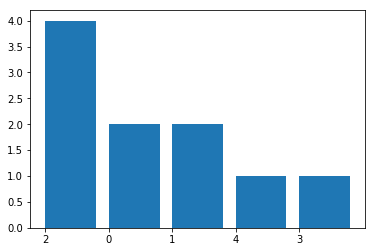

In [14]:
from IPython.display import HTML, display
import tabulate

import newspaper
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import pandas as pd
import collections
from pprint import pprint

# Test domains
cnn = "https://edition.cnn.com/"
new_york_times = "https://www.nytimes.com/"

# Parameters
article_num = 10 # Number of articles to extract.
cluster_num = 5

# Build source. 
paper = newspaper.build(new_york_times, memoize_articles=False)

# Extract titles.
titles = []
for article in paper.articles[:article_num]:
    article.download()
    article.parse()
    titles.append(article.title)
    
pprint("--- Extracted titles ---")
print(pd.DataFrame(titles))
#display(HTML(tabulate.tabulate(titles, tablefmt='html')))


# Vectorizing with TF-IDF.
vectorizer = TfidfVectorizer()
tfidf_model = vectorizer.fit_transform(titles)

pprint("--- tfidf model ---")
pprint(pd.DataFrame(vectorizer.get_feature_names()))
print(tfidf_model)

# K-means Clustering.
km_model = KMeans(n_clusters=cluster_num)
km_model.fit(tfidf_model)

# Cluster output mapping.
clustering = collections.defaultdict(list)
for idx, label in enumerate(km_model.labels_):
    clustering[label].append(idx)

pprint("--- KMeans Clustering ---")
pprint(clustering)

# Sentence label mapping.
title_label_mapping = []
for label in clustering:
    for i in clustering[label]:
        title_label_mapping.append([label, titles[i]])

pprint("--- Title & Label Mapping ---")
display(HTML(tabulate.tabulate(title_label_mapping, tablefmt='html')))

# Set data for bar graph.
bar_graph = []
for i in clustering:
    label_num = len(clustering[i])
    bar_graph.append([i, label_num])

# Set graph x, y size.
x = range(0, len(bar_graph))
y = range(0, 30)

# Set y axis data and label.
y_data = [i[1] for i in bar_graph]
labels = [i[0] for i in bar_graph]

# Show graph
plt.bar(x, y_data, tick_label=labels, align="edge", linewidth=50)
plt.show()


